In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

In [9]:
Data = np.genfromtxt('Color.txt',delimiter='\t',skip_header=1)
Data[:5]

array([[ 74.,  85., 123.,   1.],
       [ 73.,  84., 122.,   1.],
       [ 72.,  83., 121.,   1.],
       [ 70.,  81., 119.,   1.],
       [ 70.,  81., 119.,   1.]])

In [10]:
X = Data[:,:-1]

In [11]:
Y = Data[:,-1]

In [12]:
X[:5]

array([[ 74.,  85., 123.],
       [ 73.,  84., 122.],
       [ 72.,  83., 121.],
       [ 70.,  81., 119.],
       [ 70.,  81., 119.]])

In [13]:
Y[:5]

array([1., 1., 1., 1., 1.])

In [14]:
np.unique(Y)

array([1., 2.])

In [15]:
Y = Y-1

In [16]:
np.unique(Y)

array([0., 1.])

In [17]:
Y = np.expand_dims(Y,axis=1)

In [18]:
Y.shape

(245057, 1)

In [19]:
XTr,XT,YTr,YT=train_test_split(X,Y,test_size=0.1)

In [20]:
Encoder = OneHotEncoder()

In [21]:
Encoder.fit(XTr)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [24]:
Encoder.categories_

[array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
         11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
         22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
         33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
         44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
         55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
         66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
         77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
         88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
         99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
        110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
        121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
        132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
        143., 144., 145., 146., 147., 

In [32]:
model = SGDClassifier(loss='log',
                      penalty='elasticnet',
                      max_iter=1000,
                      tol=1e-5,
                      learning_rate='constant',
                      eta0=1e-2,
                      early_stopping=False,
                      verbose=1)

In [33]:
model.fit(Encoder.transform(XTr),YTr)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 21.52, NNZs: 752, Bias: 0.739872, T: 220551, Avg. loss: 0.306149
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 27.61, NNZs: 743, Bias: 0.959779, T: 441102, Avg. loss: 0.204971
Total training time: 0.10 seconds.
-- Epoch 3
Norm: 30.72, NNZs: 741, Bias: 1.113793, T: 661653, Avg. loss: 0.181710
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 32.48, NNZs: 736, Bias: 1.244517, T: 882204, Avg. loss: 0.171345
Total training time: 0.21 seconds.
-- Epoch 5
Norm: 33.53, NNZs: 737, Bias: 1.353236, T: 1102755, Avg. loss: 0.165872
Total training time: 0.26 seconds.
-- Epoch 6
Norm: 34.18, NNZs: 745, Bias: 1.446657, T: 1323306, Avg. loss: 0.162673
Total training time: 0.32 seconds.
-- Epoch 7
Norm: 34.61, NNZs: 741, Bias: 1.524680, T: 1543857, Avg. loss: 0.160759
Total training time: 0.37 seconds.
-- Epoch 8
Norm: 34.88, NNZs: 745, Bias: 1.596384, T: 1764408, Avg. loss: 0.159427
Total training time: 0.43 seconds.
-- Epoch 9
Norm: 35.08, NNZs: 746, Bias: 1.657657, T: 198495

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=1, warm_start=False)

In [35]:
from sklearn.metrics import make_scorer, f1_score
f1_scorer = make_scorer(f1_score)

In [38]:
operation = GridSearchCV(estimator=model,
                         n_jobs=-1,
                         param_grid={'alpha':np.logspace(-4,3,num=7),
                                     'l1_ratio':[0.1, 0.25, 0.5, 0.75, 0.9]},
                         scoring=f1_scorer,
                         cv=10,verbose=1)

In [39]:
operation.fit(Encoder.transform(XTr),YTr)

Fitting 10 folds for each of 35 candidates, totalling 350 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   23.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 350 out of 350 | elapsed:  1.3min finished
/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-- Epoch 1
Norm: 23.00, NNZs: 687, Bias: 0.741473, T: 220551, Avg. loss: 0.312315
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 31.78, NNZs: 672, Bias: 0.942161, T: 441102, Avg. loss: 0.210371
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 37.83, NNZs: 675, Bias: 1.081320, T: 661653, Avg. loss: 0.184551
Total training time: 0.18 seconds.
-- Epoch 4
Norm: 42.54, NNZs: 672, Bias: 1.191484, T: 882204, Avg. loss: 0.171842
Total training time: 0.24 seconds.
-- Epoch 5
Norm: 46.45, NNZs: 666, Bias: 1.285131, T: 1102755, Avg. loss: 0.164216
Total training time: 0.30 seconds.
-- Epoch 6
Norm: 49.81, NNZs: 665, Bias: 1.361415, T: 1323306, Avg. loss: 0.159314
Total training time: 0.36 seconds.
-- Epoch 7
Norm: 52.77, NNZs: 657, Bias: 1.424701, T: 1543857, Avg. loss: 0.155906
Total training time: 0.42 seconds.
-- Epoch 8
Norm: 55.37, NNZs: 654, Bias: 1.493184, T: 1764408, Avg. loss: 0.153364
Total training time: 0.48 seconds.
-- Epoch 9
Norm: 57.74, NNZs: 646, Bias: 1.545651, T: 198495

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.01, fit_intercept=True,
       l1_ratio=0.15, learning_rate='constant', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='elasticnet',
       power_t=0.5, random_state=None, shuffle=True, tol=1e-05,
       validation_fraction=0.1, verbose=1, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([1.00000e-04, 1.46780e-03, 2.15443e-02, 3.16228e-01, 4.64159e+00,
       6.81292e+01, 1.00000e+03]), 'l1_ratio': [0.1, 0.25, 0.5, 0.75, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=make_scorer(f1_score), verbose=1)

In [40]:
BestModel = operation.best_estimator_

In [57]:
operation.best_score_

0.9752312376452901

In [41]:
f1_score(YT,BestModel.predict(Encoder.transform(XT)))

0.9741254398675222

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score

In [45]:
fpr,tpr,thresholds = roc_curve(YT,
                               BestModel.predict_proba(Encoder.transform(XT))[:,1])

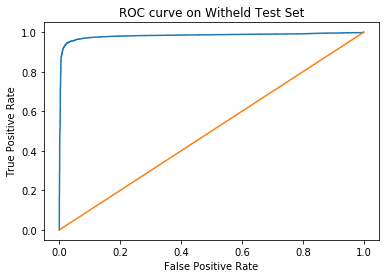

Area Under The Curve: 0.982


In [56]:
plt.plot(fpr,tpr)
plt.plot(tpr,tpr)
plt.title('ROC curve on Witheld Test Set')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
print('Area Under The Curve: {}'.format(np.round(roc_auc_score(YT,
                                                      BestModel.predict_proba(Encoder.transform(XT))[:,1]),
                                                 decimals=3)))

In [95]:
weights=BestModel.coef_

In [89]:
Features = np.asarray(Encoder.categories_)

In [90]:
Features = Features.astype(dtype=np.str)

In [91]:
Features

array([['0.0', '1.0', '2.0', '3.0', '4.0', '5.0', '6.0', '7.0', '8.0',
        '9.0', '10.0', '11.0', '12.0', '13.0', '14.0', '15.0', '16.0',
        '17.0', '18.0', '19.0', '20.0', '21.0', '22.0', '23.0', '24.0',
        '25.0', '26.0', '27.0', '28.0', '29.0', '30.0', '31.0', '32.0',
        '33.0', '34.0', '35.0', '36.0', '37.0', '38.0', '39.0', '40.0',
        '41.0', '42.0', '43.0', '44.0', '45.0', '46.0', '47.0', '48.0',
        '49.0', '50.0', '51.0', '52.0', '53.0', '54.0', '55.0', '56.0',
        '57.0', '58.0', '59.0', '60.0', '61.0', '62.0', '63.0', '64.0',
        '65.0', '66.0', '67.0', '68.0', '69.0', '70.0', '71.0', '72.0',
        '73.0', '74.0', '75.0', '76.0', '77.0', '78.0', '79.0', '80.0',
        '81.0', '82.0', '83.0', '84.0', '85.0', '86.0', '87.0', '88.0',
        '89.0', '90.0', '91.0', '92.0', '93.0', '94.0', '95.0', '96.0',
        '97.0', '98.0', '99.0', '100.0', '101.0', '102.0', '103.0',
        '104.0', '105.0', '106.0', '107.0', '108.0', '109.0', '110.0',

In [92]:
for num,Color in enumerate(['Blue','Green','Red']):
    for i in range(Features.shape[1]):
        Features[num,i]=Color+Features[num,i]

In [93]:
Feats = Features.flatten()

In [94]:
Feats

array(['Blue0.0', 'Blue1.0', 'Blue2.0', 'Blue3.0', 'Blue4.0', 'Blue5.0',
       'Blue6.0', 'Blue7.0', 'Blue8.0', 'Blue9.0', 'Blue10.0', 'Blue11.0',
       'Blue12.0', 'Blue13.0', 'Blue14.0', 'Blue15.0', 'Blue16.0',
       'Blue17.0', 'Blue18.0', 'Blue19.0', 'Blue20.0', 'Blue21.0',
       'Blue22.0', 'Blue23.0', 'Blue24.0', 'Blue25.0', 'Blue26.0',
       'Blue27.0', 'Blue28.0', 'Blue29.0', 'Blue30.0', 'Blue31.0',
       'Blue32.0', 'Blue33.0', 'Blue34.0', 'Blue35.0', 'Blue36.0',
       'Blue37.0', 'Blue38.0', 'Blue39.0', 'Blue40.0', 'Blue41.0',
       'Blue42.0', 'Blue43.0', 'Blue44.0', 'Blue45.0', 'Blue46.0',
       'Blue47.0', 'Blue48.0', 'Blue49.0', 'Blue50.0', 'Blue51.0',
       'Blue52.0', 'Blue53.0', 'Blue54.0', 'Blue55.0', 'Blue56.0',
       'Blue57.0', 'Blue58.0', 'Blue59.0', 'Blue60.0', 'Blue61.0',
       'Blue62.0', 'Blue63.0', 'Blue64.0', 'Blue65.0', 'Blue66.0',
       'Blue67.0', 'Blue68.0', 'Blue69.0', 'Blue70.0', 'Blue71.0',
       'Blue72.0', 'Blue73.0', 'Blue74.0', 'Blue

In [114]:
# finding the most important weights in descending order

Feats[np.argsort(weights)]

array([['Red225.0', 'Red229.0', 'Red226.0', 'Red227.0', 'Red228.0',
        'Red224.0', 'Red230.0', 'Red221.0', 'Red222.0', 'Red223.0',
        'Red231.0', 'Red254.0', 'Red219.0', 'Red220.0', 'Red232.0',
        'Red253.0', 'Red218.0', 'Red234.0', 'Red233.0', 'Red252.0',
        'Red236.0', 'Red235.0', 'Red216.0', 'Red217.0', 'Red215.0',
        'Red237.0', 'Red251.0', 'Red255.0', 'Red238.0', 'Red214.0',
        'Red239.0', 'Red212.0', 'Red213.0', 'Red241.0', 'Red193.0',
        'Red240.0', 'Red210.0', 'Red211.0', 'Red190.0', 'Red191.0',
        'Red184.0', 'Red189.0', 'Red194.0', 'Red188.0', 'Green98.0',
        'Red192.0', 'Green100.0', 'Red244.0', 'Green99.0', 'Green90.0',
        'Red195.0', 'Green91.0', 'Red196.0', 'Green101.0', 'Red185.0',
        'Red250.0', 'Red243.0', 'Green89.0', 'Red242.0', 'Green88.0',
        'Green103.0', 'Green102.0', 'Red187.0', 'Green93.0', 'Red249.0',
        'Red186.0', 'Green104.0', 'Green105.0', 'Red209.0', 'Red208.0',
        'Green92.0', 'Red197.

In [115]:
weights

array([[ 3.3699439 ,  2.03396925,  1.29426661,  1.11141374,  0.93112615,
         0.54647508,  0.43578466,  0.31157718,  0.23664954,  0.18509913,
         0.44254012,  0.23733008,  0.63250881,  0.45991089,  0.89420491,
         0.81736978,  1.29246966,  0.78379145,  0.30527282,  0.34514318,
         0.18302427,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.21952457,
        -0.46365753, -0.49145066, -1.06451213, -1.34096663, -1.48511705,
        -1.66612105, -1.70484055, -1.68978289, -1.68277643, -1.65834353,
        -1.79813455, -1.59985683, -1.49320402, -1.48450248, -1.52234329,
        -1.42309591, -1.42131118, -1.55590908, -1.3648839 , -1.36604698,
        -1.19490212, -1.06625459, -1.40088739, -1.15467506, -1.36328974,
        -1.0475787 , -1.07443362, -1.02370856, -1.0